In [1]:
import os
import sys
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

In [2]:
# Lets load customer dataset
customer_df = pd.read_csv("Udacity_CUSTOMERS_052018.csv", sep=";")

/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (18,19) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
customer_df.head(n=10)

,LNR,AGER_TYP,AKT_DAT_KL,ALTER_HH,ALTER_KIND1,ALTER_KIND2,ALTER_KIND3,ALTER_KIND4,ALTERSKATEGORIE_FEIN,ANZ_HAUSHALTE_AKTIV,...,VK_ZG11,W_KEIT_KIND_HH,WOHNDAUER_2008,WOHNLAGE,ZABEOTYP,PRODUCT_GROUP,CUSTOMER_GROUP,ONLINE_PURCHASE,ANREDE_KZ,ALTERSKATEGORIE_GROB
0,9626,2,1.0,10.0,NaN,NaN,NaN,NaN,10.0,1.0,...,2.0,6.0,9.0,7.0,3,COSMETIC_AND_FOOD,MULTI_BUYER,0,1,4
1,9628,-1,9.0,11.0,NaN,NaN,NaN,NaN,NaN,NaN,...,3.0,0.0,9.0,NaN,3,FOOD,SINGLE_BUYER,0,1,4
2,143872,-1,1.0,6.0,NaN,NaN,NaN,NaN,0.0,1.0,...,11.0,6.0,9.0,2.0,3,COSMETIC_AND_FOOD,MULTI_BUYER,0,2,4
3,143873,1,1.0,8.0,NaN,NaN,NaN,NaN,8.0,0.0,...,2.0,NaN,9.0,7.0,1,COSMETIC,MULTI_BUYER,0,1,4
4,143874,-1,1.0,20.0,NaN,NaN,NaN,NaN,14.0,7.0,...,4.0,2.0,9.0,3.0,1,FOOD,MULTI_BUYER,0,1,3
5,143888,1,1.0,11.0,NaN,NaN,NaN,NaN,10.0,1.0,...,1.0,6.0,9.0,1.0,2,COSMETIC_AND_FOOD,MULTI_BUYER,0,1,3
6,143904,2,1.0,10.0,NaN,NaN,NaN,NaN,10.0,1.0,...,2.0,6.0,9.0,7.0,1,COSMETIC_AND_FOOD,MULTI_BUYER,0,1,4
7,143910,1,1.0,10.0,NaN,NaN,NaN,NaN,9.0,1.0,...,1.0,6.0,9.0,3.0,3,FOOD,SINGLE_BUYER,0,1,4
8,102160,2,3.0,5.0,NaN,NaN,NaN,NaN,4.0,74.0,...,9.0,6.0,3.0,4.0,3,COSMETIC,MULTI_BUYER,0,2,4
9,102173,1,1.0,20.0,NaN,NaN,NaN,NaN,13.0,1.0,...,4.0,2.0,9.0,5.0,1,COSMETIC,MULTI_BUYER,0,1,3


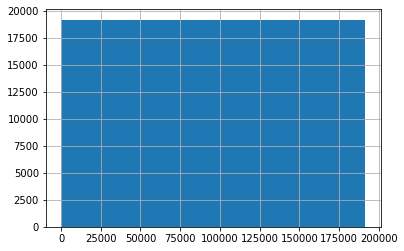

In [4]:
customer_df['LNR'].hist()

In [5]:
customer_df = customer_df.drop('LNR', axis=1)

In [7]:
customer_df.shape

(191652, 368)

In [8]:
"""
Preparing key:value pair to track the unknowns in the Azdias data set
"""
def to_int(labels):
    return [int(l) for l in labels]
    
fin = open("attributes_unknowns_label.txt","r")
attributes_unk_label = {}
for line in fin:
    line = line.rstrip()
    attribute = line.split()[0]
    if "no transaction" in line:
        #print(line.rstrip())
        label = line.split("no")[0].split()[-1]
        #print(attribute, label)
        attributes_unk_label[attribute] = [int(label)]
    else:
        try:
            label = line.split("unknown")[0].split('"')[-2].split(',')
            #print(attribute, label)
            attributes_unk_label[attribute] = to_int(label)
        except IndexError:
            #print(line)
            label = line.split("unknown")[0].split()[-1]
            #print(attribute, label)
            attributes_unk_label[attribute] = [int(label)]
fin.close()

In [9]:
attributes_unk_label

{'AGER_TYP': [-1],
 'ALTERSKATEGORIE_GROB': [-1, 0],
 'ALTER_HH': [0],
 'ANREDE_KZ': [-1, 0],
 'BALLRAUM': [-1],
 'BIP_FLAG': [-1],
 'CAMEO_DEUG_2015': [-1],
 'CAMEO_DEUINTL_2015': [-1],
 'CJT_GESAMTTYP': [0],
 'D19_BANKEN_ANZ_12': [0],
 'D19_BANKEN_ANZ_24': [0],
 'D19_BANKEN_DATUM': [10],
 'D19_BANKEN_DIREKT_RZ': [0],
 'D19_BANKEN_GROSS_RZ': [0],
 'D19_BANKEN_LOKAL_RZ': [0],
 'D19_BANKEN_OFFLINE_DATUM': [10],
 'D19_BANKEN_ONLINE_DATUM': [10],
 'D19_BANKEN_REST_RZ': [0],
 'D19_BEKLEIDUNG_GEH_RZ': [0],
 'D19_BEKLEIDUNG_REST_RZ': [0],
 'D19_BILDUNG_RZ': [0],
 'D19_BIO_OEKO_RZ': [0],
 'D19_BUCH_RZ': [0],
 'D19_DIGIT_SERV_RZ': [0],
 'D19_DROGERIEARTIKEL_RZ': [0],
 'D19_ENERGIE_RZ': [0],
 'D19_FREIZEIT_RZ': [0],
 'D19_GARTEN_RZ': [0],
 'D19_GESAMT_ANZ_12': [0],
 'D19_GESAMT_ANZ_24': [0],
 'D19_GESAMT_DATUM': [10],
 'D19_GESAMT_OFFLINE_DATUM': [10],
 'D19_GESAMT_ONLINE_DATUM': [10],
 'D19_HANDWERK_RZ': [0],
 'D19_HAUS_DEKO_RZ': [0],
 'D19_KINDERARTIKEL_RZ': [0],
 'D19_KK_KUNDENTYP': [-1],
 '

In [10]:
# loading keys whose discription is provided
known_keys = []
fin=open("keys_with_info.txt","r")
for line in fin:
    try:
        token = line.rstrip().split()
        known_keys.append(token[0])
    except IndexError:
        continue
fin.close()
print(len(known_keys))
#print(known_keys)

314


In [12]:
unknown_keys=set(customer_df.columns)-set(known_keys)
print(len(unknown_keys))

96


In [13]:
## Lets swap all the unknown labels with np.nan 
for c in attributes_unk_label:
    if not c in customer_df.columns:  # the information on the key is not provided/unknown key
        continue
    try:
        if len(attributes_unk_label[c])>1:
            customer_df[c] = np.where((customer_df[c] == attributes_unk_label[c][0]), np.nan, customer_df[c])
            customer_df[c] = np.where((customer_df[c] == attributes_unk_label[c][1]), np.nan, customer_df[c])
        else:
            customer_df[c] = np.where((customer_df[c] == attributes_unk_label[c][0]), np.nan, customer_df[c])
    except TypeError:
        print(c)
        customer_df[c] = np.where((customer_df[c] == attributes_unk_label[c][0]) , np.nan, customer_df[c])

In [14]:
customer_df.head(n=10)

,AGER_TYP,AKT_DAT_KL,ALTER_HH,ALTER_KIND1,ALTER_KIND2,ALTER_KIND3,ALTER_KIND4,ALTERSKATEGORIE_FEIN,ANZ_HAUSHALTE_AKTIV,ANZ_HH_TITEL,...,VK_ZG11,W_KEIT_KIND_HH,WOHNDAUER_2008,WOHNLAGE,ZABEOTYP,PRODUCT_GROUP,CUSTOMER_GROUP,ONLINE_PURCHASE,ANREDE_KZ,ALTERSKATEGORIE_GROB
0,2.0,1.0,10.0,NaN,NaN,NaN,NaN,10.0,1.0,0.0,...,2.0,6.0,9.0,7.0,3.0,COSMETIC_AND_FOOD,MULTI_BUYER,0,1.0,4.0
1,NaN,9.0,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.0,NaN,9.0,NaN,3.0,FOOD,SINGLE_BUYER,0,1.0,4.0
2,NaN,1.0,6.0,NaN,NaN,NaN,NaN,0.0,1.0,0.0,...,11.0,6.0,9.0,2.0,3.0,COSMETIC_AND_FOOD,MULTI_BUYER,0,2.0,4.0
3,1.0,1.0,8.0,NaN,NaN,NaN,NaN,8.0,0.0,NaN,...,2.0,NaN,9.0,7.0,1.0,COSMETIC,MULTI_BUYER,0,1.0,4.0
4,NaN,1.0,20.0,NaN,NaN,NaN,NaN,14.0,7.0,0.0,...,4.0,2.0,9.0,3.0,1.0,FOOD,MULTI_BUYER,0,1.0,3.0
5,1.0,1.0,11.0,NaN,NaN,NaN,NaN,10.0,1.0,0.0,...,1.0,6.0,9.0,1.0,2.0,COSMETIC_AND_FOOD,MULTI_BUYER,0,1.0,3.0
6,2.0,1.0,10.0,NaN,NaN,NaN,NaN,10.0,1.0,0.0,...,2.0,6.0,9.0,7.0,1.0,COSMETIC_AND_FOOD,MULTI_BUYER,0,1.0,4.0
7,1.0,1.0,10.0,NaN,NaN,NaN,NaN,9.0,1.0,0.0,...,1.0,6.0,9.0,3.0,3.0,FOOD,SINGLE_BUYER,0,1.0,4.0
8,2.0,3.0,5.0,NaN,NaN,NaN,NaN,4.0,74.0,2.0,...,9.0,6.0,3.0,4.0,3.0,COSMETIC,MULTI_BUYER,0,2.0,4.0
9,1.0,1.0,20.0,NaN,NaN,NaN,NaN,13.0,1.0,0.0,...,4.0,2.0,9.0,5.0,1.0,COSMETIC,MULTI_BUYER,0,1.0,3.0


In [15]:
print("the number of columns with known description =",len(customer_df.columns) - len(unknown_keys))

the number of columns with known description = 272


In [16]:
#Lets drop columns with more than 30% NaNs
columns_nan_count = customer_df.isna().sum()
columns_to_drop = [customer_df.columns[i] for i in range(len(columns_nan_count)) if columns_nan_count[i]/len(customer_df) >= 0.3]
customer_df_dropped = customer_df.drop(columns_to_drop, axis=1)
print("shape after dropping", customer_df_dropped.shape)

shape after dropping (191652, 334)


In [17]:
# lets also drop columns for which we do not know the descriptions
for c in unknown_keys:
    if c in customer_df_dropped.columns:
        customer_df_dropped = customer_df_dropped.drop(c, axis=1)

print("shape after removing columns without description", customer_df_dropped.shape)

shape after removing columns without description (191652, 244)


In [18]:
# Columns where categorical features could use one hot encoding
customer_df_dropped.columns[np.where(customer_df_dropped.dtypes==object)]

Index(['CAMEO_DEU_2015', 'CAMEO_DEUG_2015', 'OST_WEST_KZ'], dtype='object')

In [20]:
# Finding categories of CAMEO_DEU_2015
CAMEO_DEU_2015_vals = []
for c in customer_df_dropped['CAMEO_DEU_2015']:
    if c not in CAMEO_DEU_2015_vals:
        CAMEO_DEU_2015_vals.append(c)
print(CAMEO_DEU_2015_vals)
print(len(CAMEO_DEU_2015_vals))

['1A', nan, '5D', '4C', '7B', '3B', '1D', '9E', '2D', '4A', '6B', '9D', '8B', '5C', '9C', '4E', '6C', '8C', '8A', '5B', '9B', '3D', '2A', '3C', '5F', '7A', '1E', '2C', '7C', '5A', '2B', '6D', '7E', '5E', '6E', '3A', '9A', '4B', '1C', '1B', '6A', '8D', '7D', '6F', '4D', 'XX']
46


In [21]:
#Converting the 'XX' to NaN
customer_df_dropped['CAMEO_DEU_2015'] = np.where((customer_df_dropped['CAMEO_DEU_2015'] == 'XX'), np.nan, customer_df_dropped['CAMEO_DEU_2015'])
customer_df_dropped['CAMEO_DEU_2015'][customer_df_dropped['CAMEO_DEU_2015']=='XX'] # testing if replacement worked

Series([], Name: CAMEO_DEU_2015, dtype: object)

In [22]:
nc1 = customer_df_dropped['CAMEO_DEU_2015'].isna().sum()
print(nc1)
print("%nan", nc1*100/len(customer_df_dropped['CAMEO_DEU_2015']))

50554
%nan 26.37801849184981


In [41]:
# Finding categories of CAMEO_DEUG_2015

# CAMEO_DEUG_2015_vals = []
# for i in range(len(azdias_df_dropped['CAMEO_DEUG_2015'])):
#     c = azdias_df_dropped['CAMEO_DEUG_2015'][i]
#     try:
#         if str(c) not in CAMEO_DEUG_2015_vals:
#             CAMEO_DEUG_2015_vals.append(str(c))
#     except ValueError:
#         if str(c) not in CAMEO_DEUG_2015_vals:
#             CAMEO_DEUG_2015_vals.append(str(c))
# print(sorted(CAMEO_DEUG_2015_vals))
# print(len(CAMEO_DEUG_2015_vals))


CAMEO_DEUG_2015_vals = []
for i in range(len(customer_df_dropped['CAMEO_DEUG_2015'])):
    c = customer_df_dropped['CAMEO_DEUG_2015'][i]
    if c not in CAMEO_DEUG_2015_vals:
        CAMEO_DEUG_2015_vals.append(c)
#print(sorted(CAMEO_DEUG_2015_vals))
print(CAMEO_DEUG_2015_vals[:10])
print(len(CAMEO_DEUG_2015_vals))

[1.0, nan, 5.0, 4.0, 7.0, 3.0, 9.0, nan, 2.0, 6.0]
15194


In [32]:
#converting 'X' to NaN
customer_df_dropped['CAMEO_DEUG_2015'] = np.where((customer_df_dropped['CAMEO_DEUG_2015'] == 'X'), np.nan, customer_df_dropped['CAMEO_DEUG_2015'])

In [57]:
# Fix the categories for CAMEO_DEUG_2015 such as 1 and 1.0 are the same
for i in range(len(customer_df_dropped['CAMEO_DEUG_2015'])):
    try:
        if not np.isnan(customer_df_dropped['CAMEO_DEUG_2015'][i]):
            customer_df_dropped['CAMEO_DEUG_2015'][i] = int(customer_df_dropped['CAMEO_DEUG_2015'][i])
        else:
            customer_df_dropped['CAMEO_DEUG_2015'][i] = np.nan
    except TypeError:
        customer_df_dropped['CAMEO_DEUG_2015'][i] = int(float(str(customer_df_dropped['CAMEO_DEUG_2015'][i])))

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [58]:
CAMEO_DEUG_2015_vals = []
for i in range(len(customer_df_dropped['CAMEO_DEUG_2015'])):
    c = customer_df_dropped['CAMEO_DEUG_2015'][i]
    if c not in CAMEO_DEUG_2015_vals:
        CAMEO_DEUG_2015_vals.append(c)
print(sorted(CAMEO_DEUG_2015_vals))
#print(CAMEO_DEUG_2015_vals[:10])
print(len(CAMEO_DEUG_2015_vals))

[1, nan, 2, 3, 4, 5, 6, 7, 8, 9]
10


In [64]:
nc2 = customer_df_dropped['CAMEO_DEUG_2015'].isna().sum()
print(nc2)
print("%nan", nc2*100/len(customer_df_dropped['CAMEO_DEUG_2015']))

50554
%nan 26.37801849184981


In [65]:
# Finding categories of OST_WEST_KZ ('O'/'W' were converted to 0/1 respectively)
OST_WEST_KZ_vals = []
for i in range(len(customer_df_dropped['OST_WEST_KZ'])):
    c = customer_df_dropped['OST_WEST_KZ'][i]
    try:
        if str(int(c)) not in OST_WEST_KZ_vals:
            OST_WEST_KZ_vals.append(str(int(c)))
    except ValueError:
        if str(c) not in OST_WEST_KZ_vals:
            OST_WEST_KZ_vals.append(str(c))
print(sorted(OST_WEST_KZ_vals))
print(len(OST_WEST_KZ_vals))

['O', 'W', 'nan']
3


In [67]:
nc3 = customer_df_dropped['OST_WEST_KZ'].isna().sum()
print(nc3)
print("%nan", nc3*100/len(customer_df_dropped['OST_WEST_KZ']))

49927
%nan 26.050863022561728


In [68]:
# Lets binary encode the 'OST_WEST_KZ' column
customer_df_dropped['OST_WEST_KZ'] = np.where((customer_df_dropped['OST_WEST_KZ'] == 'O'), 0, customer_df_dropped['OST_WEST_KZ'])
customer_df_dropped['OST_WEST_KZ'] = np.where((customer_df_dropped['OST_WEST_KZ'] == 'W'), 1, customer_df_dropped['OST_WEST_KZ'])

In [72]:
# Lets one hot encode CAMEO_DEUG_2015
customer_df_dropped = pd.concat([customer_df_dropped, pd.get_dummies(customer_df_dropped['CAMEO_DEUG_2015'], prefix='CAMEO_DEUG_2015',dummy_na=True)],axis=1).drop(['CAMEO_DEUG_2015'], axis=1)

In [75]:
# Lets drop the CAMEO_DEUG_2015_nan column
customer_df_dropped = customer_df_dropped.drop('CAMEO_DEUG_2015_nan', axis=1)

In [76]:
# Lets one-hot encode CAMEO_DEU_2015 column
customer_df_dropped = pd.concat([customer_df_dropped, pd.get_dummies(customer_df_dropped['CAMEO_DEU_2015'], prefix='CAMEO_DEU_2015',dummy_na=True)],axis=1).drop(['CAMEO_DEU_2015'],axis=1)

In [82]:
i=0
for c in customer_df_dropped.columns:
    if c.startswith('CAMEO_DEU_2015'):
        print(c, end=',')
        i += 1

CAMEO_DEU_2015_1A,CAMEO_DEU_2015_1B,CAMEO_DEU_2015_1C,CAMEO_DEU_2015_1D,CAMEO_DEU_2015_1E,CAMEO_DEU_2015_2A,CAMEO_DEU_2015_2B,CAMEO_DEU_2015_2C,CAMEO_DEU_2015_2D,CAMEO_DEU_2015_3A,CAMEO_DEU_2015_3B,CAMEO_DEU_2015_3C,CAMEO_DEU_2015_3D,CAMEO_DEU_2015_4A,CAMEO_DEU_2015_4B,CAMEO_DEU_2015_4C,CAMEO_DEU_2015_4D,CAMEO_DEU_2015_4E,CAMEO_DEU_2015_5A,CAMEO_DEU_2015_5B,CAMEO_DEU_2015_5C,CAMEO_DEU_2015_5D,CAMEO_DEU_2015_5E,CAMEO_DEU_2015_5F,CAMEO_DEU_2015_6A,CAMEO_DEU_2015_6B,CAMEO_DEU_2015_6C,CAMEO_DEU_2015_6D,CAMEO_DEU_2015_6E,CAMEO_DEU_2015_6F,CAMEO_DEU_2015_7A,CAMEO_DEU_2015_7B,CAMEO_DEU_2015_7C,CAMEO_DEU_2015_7D,CAMEO_DEU_2015_7E,CAMEO_DEU_2015_8A,CAMEO_DEU_2015_8B,CAMEO_DEU_2015_8C,CAMEO_DEU_2015_8D,CAMEO_DEU_2015_9A,CAMEO_DEU_2015_9B,CAMEO_DEU_2015_9C,CAMEO_DEU_2015_9D,CAMEO_DEU_2015_9E,

In [81]:
# Lets drop the CAMEO_DEU_2015_nan column
customer_df_dropped = customer_df_dropped.drop('CAMEO_DEU_2015_nan', axis=1)

In [107]:
# Lots of column in the dataset with >28% nan
to_drop = np.where(customer_df_dropped.isna().sum()*100/len(customer_df_dropped) > 29)
to_drop, len(to_drop[0])

((array([ 26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
          39,  40,  41,  42,  43,  44,  45,  46,  47,  49,  50,  51,  52,
          53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
          66,  67,  68,  69,  71,  72,  73,  74,  75,  76,  77,  78,  79,
          80,  81,  82,  83,  84,  85,  86,  87,  88,  89, 205, 236]),),
 64)

In [114]:
columns_to_drop = [customer_df_dropped.columns[c] for c in to_drop[0]]
print(columns_to_drop)

['KBA05_ALTER1', 'KBA05_ALTER2', 'KBA05_ALTER3', 'KBA05_ALTER4', 'KBA05_ANHANG', 'KBA05_ANTG1', 'KBA05_ANTG2', 'KBA05_ANTG3', 'KBA05_ANTG4', 'KBA05_AUTOQUOT', 'KBA05_CCM1', 'KBA05_CCM2', 'KBA05_CCM3', 'KBA05_CCM4', 'KBA05_DIESEL', 'KBA05_FRAU', 'KBA05_GBZ', 'KBA05_HERST1', 'KBA05_HERST2', 'KBA05_HERST3', 'KBA05_HERST4', 'KBA05_HERST5', 'KBA05_KRSAQUOT', 'KBA05_KRSHERST1', 'KBA05_KRSHERST2', 'KBA05_KRSHERST3', 'KBA05_KRSKLEIN', 'KBA05_KRSOBER', 'KBA05_KRSVAN', 'KBA05_KRSZUL', 'KBA05_KW1', 'KBA05_KW2', 'KBA05_KW3', 'KBA05_MAXAH', 'KBA05_MAXBJ', 'KBA05_MAXHERST', 'KBA05_MAXSEG', 'KBA05_MAXVORB', 'KBA05_MOD1', 'KBA05_MOD2', 'KBA05_MOD3', 'KBA05_MOD4', 'KBA05_MOD8', 'KBA05_MOTOR', 'KBA05_MOTRAD', 'KBA05_SEG1', 'KBA05_SEG10', 'KBA05_SEG2', 'KBA05_SEG3', 'KBA05_SEG4', 'KBA05_SEG5', 'KBA05_SEG6', 'KBA05_SEG7', 'KBA05_SEG8', 'KBA05_SEG9', 'KBA05_VORB0', 'KBA05_VORB1', 'KBA05_VORB2', 'KBA05_ZUL1', 'KBA05_ZUL2', 'KBA05_ZUL3', 'KBA05_ZUL4', 'MOBI_REGIO', 'W_KEIT_KIND_HH']


In [115]:
# Lets also drop these columns with >28% NaNs
customer_df_dropped_new = customer_df_dropped.drop(columns_to_drop, axis = 1)

In [120]:
customer_df_dropped_new.shape

(191652, 231)

In [118]:
# Imputing using the most frequent value in the column
customer_df_dropped_new = customer_df_dropped_new.fillna(customer_df_dropped_new.mode().iloc[0])

In [119]:
customer_df_dropped_new.head(n=10)

,ANZ_HAUSHALTE_AKTIV,ANZ_HH_TITEL,ANZ_PERSONEN,ANZ_TITEL,BALLRAUM,CJT_GESAMTTYP,D19_BANKEN_ONLINE_QUOTE_12,D19_GESAMT_ONLINE_QUOTE_12,D19_KONSUMTYP,D19_VERSAND_ONLINE_QUOTE_12,...,CAMEO_DEU_2015_7E,CAMEO_DEU_2015_8A,CAMEO_DEU_2015_8B,CAMEO_DEU_2015_8C,CAMEO_DEU_2015_8D,CAMEO_DEU_2015_9A,CAMEO_DEU_2015_9B,CAMEO_DEU_2015_9C,CAMEO_DEU_2015_9D,CAMEO_DEU_2015_9E
0,1.0,0.0,2.0,0.0,3.0,5.0,0.0,0.0,3.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,1.0,0.0,3.0,0.0,6.0,6.0,0.0,0.0,5.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,1.0,0.0,1.0,0.0,7.0,2.0,0.0,0.0,3.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,0.0,0.0,0.0,0.0,7.0,2.0,0.0,0.0,3.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,7.0,0.0,4.0,0.0,3.0,6.0,0.0,10.0,1.0,10.0,...,0,0,0,0,0,0,0,0,0,0
5,1.0,0.0,2.0,0.0,7.0,4.0,0.0,0.0,2.0,0.0,...,0,0,0,0,0,0,0,0,0,0
6,1.0,0.0,2.0,0.0,6.0,2.0,0.0,7.0,2.0,7.0,...,0,0,0,0,0,0,0,0,0,0
7,1.0,0.0,2.0,0.0,5.0,2.0,0.0,0.0,3.0,0.0,...,0,0,0,0,0,0,0,0,0,0
8,74.0,2.0,1.0,0.0,3.0,1.0,0.0,0.0,3.0,0.0,...,0,0,0,0,0,0,0,0,0,1
9,1.0,0.0,3.0,0.0,2.0,3.0,0.0,6.0,1.0,6.0,...,0,0,0,0,0,0,0,0,0,0


In [121]:
#Lets scale this data using the minmax scalet of sklearn
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [122]:
customer_df_dropped_new[customer_df_dropped_new.columns] = scaler.fit_transform(customer_df_dropped_new)

In [123]:
customer_df_dropped_new.head(n=10)

,ANZ_HAUSHALTE_AKTIV,ANZ_HH_TITEL,ANZ_PERSONEN,ANZ_TITEL,BALLRAUM,CJT_GESAMTTYP,D19_BANKEN_ONLINE_QUOTE_12,D19_GESAMT_ONLINE_QUOTE_12,D19_KONSUMTYP,D19_VERSAND_ONLINE_QUOTE_12,...,CAMEO_DEU_2015_7E,CAMEO_DEU_2015_8A,CAMEO_DEU_2015_8B,CAMEO_DEU_2015_8C,CAMEO_DEU_2015_8D,CAMEO_DEU_2015_9A,CAMEO_DEU_2015_9B,CAMEO_DEU_2015_9C,CAMEO_DEU_2015_9D,CAMEO_DEU_2015_9E
0,0.001912,0.000000,0.095238,0.0,0.333333,0.8,0.0,0.0,0.250,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.001912,0.000000,0.142857,0.0,0.833333,1.0,0.0,0.0,0.500,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.001912,0.000000,0.047619,0.0,1.000000,0.2,0.0,0.0,0.250,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.000000,0.000000,0.0,1.000000,0.2,0.0,0.0,0.250,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.013384,0.000000,0.190476,0.0,0.333333,1.0,0.0,1.0,0.000,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.001912,0.000000,0.095238,0.0,1.000000,0.6,0.0,0.0,0.125,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.001912,0.000000,0.095238,0.0,0.833333,0.2,0.0,0.7,0.125,0.7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.001912,0.000000,0.095238,0.0,0.666667,0.2,0.0,0.0,0.250,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.141491,0.086957,0.047619,0.0,0.333333,0.0,0.0,0.0,0.250,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
9,0.001912,0.000000,0.142857,0.0,0.166667,0.4,0.0,0.6,0.000,0.6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [124]:
customer_df_dropped_new.to_csv('customer_dropped_scaled.csv')

In [125]:
#TODO: Get the relevent columns from the azdias data and transform the customer column to use those columns